# ingest-croissant Workflow Demonstration

If you run the [Ingest Croissant](https://docs.aperturedata.io/workflows/ingest_criossant) workflow, you can use this notebook to test the results by querying and validating that all the information from the croissant is available inside the ApertureDB instance used for ingestion destination.

## Import some modules we will need

In [39]:
import json
from aperturedb.CommonLibrary import create_connector, execute_query
import pandas as pd
from IPython.display import display

# Also create a client to interact with the database. This would be reused throughout the notebook.
client = create_connector()

# define the URL of the dataset
dataset_croissant_url = "https://huggingface.co/api/datasets/suyc21/MedicalConverter/croissant"

## Retrieve the entity called DatasetModel

In [16]:

query = [
    {
        "FindEntity": {
            "with_class": "DatasetModel",
            "_ref": 1,
            "constraints": {
                "url": ["==", dataset_croissant_url]
            },
            "results": {
                "all_properties": True
            }
        }
    }
]

result, response, _ = execute_query(client, query)
if result == 0:
    print(json.dumps(response, indent=2))
    df = pd.json_normalize(response[0]["FindEntity"]["entities"])
    display(df)

[
  {
    "FindEntity": {
      "entities": [
        {
          "_uniqueid": "7.0.40",
          "description": "suyc21/MedicalConverter dataset hosted on Hugging Face and contributed by the HF Datasets community",
          "id": "b34dbe2791354131835b23b57e548c1d",
          "name": "MedicalConverter",
          "url": "https://huggingface.co/api/datasets/suyc21/MedicalConverter/croissant",
          "version": "1.0.0"
        }
      ],
      "returned": 1,
      "status": 0
    }
  }
]


,_uniqueid,description,id,name,url,version
0,7.0.40,suyc21/MedicalConverter dataset hosted on Hugg...,b34dbe2791354131835b23b57e548c1d,MedicalConverter,https://huggingface.co/api/datasets/suyc21/Med...,1.0.0


## Find the record sets associated with the dataset.

In [18]:
query = [
    {
        "FindEntity": {
            "with_class": "DatasetModel",
            "_ref": 1,
            "constraints": {
                "url": ["==", dataset_croissant_url]
            }
        }
    },
    {
        "FindEntity": {
            "_ref": 2,
            "is_connected_to": {
                "ref": 1
            },
            "with_class": "RecordsetModel",
            "results": {
                "all_properties": True
            }
        }
    },
]

result, response, _ = execute_query(client, query)
if result == 0:
    print(json.dumps(response, indent=2))
    df = pd.json_normalize(response[1]["FindEntity"]["entities"])
    display(df)

[
  {
    "FindEntity": {
      "returned": 0,
      "status": 0
    }
  },
  {
    "FindEntity": {
      "entities": [
        {
          "_uniqueid": "8.0.40",
          "description": "Splits for the PathVQA config.",
          "id": "2257f23e9baf41c1aad0bbb79452af5d",
          "name": "PathVQA_splits",
          "uuid": "PathVQA_splits"
        },
        {
          "_uniqueid": "8.1.40",
          "description": "suyc21/MedicalConverter - 'PathVQA' subset",
          "id": "8a2449ac881745f5991ffb5389c8bff3",
          "name": "",
          "uuid": "PathVQA"
        },
        {
          "_uniqueid": "8.2.40",
          "description": "Splits for the SLAKE config.",
          "id": "14cd2d1be5d0413895ac389ec00a6e96",
          "name": "SLAKE_splits",
          "uuid": "SLAKE_splits"
        },
        {
          "_uniqueid": "8.3.40",
          "description": "suyc21/MedicalConverter - 'SLAKE' subset",
          "id": "75c0f26954624aff80d2ff30cbdd4867",
          "name": "",
 

,_uniqueid,description,id,name,uuid
0,8.0.40,Splits for the PathVQA config.,2257f23e9baf41c1aad0bbb79452af5d,PathVQA_splits,PathVQA_splits
1,8.1.40,suyc21/MedicalConverter - 'PathVQA' subset,8a2449ac881745f5991ffb5389c8bff3,,PathVQA
2,8.2.40,Splits for the SLAKE config.,14cd2d1be5d0413895ac389ec00a6e96,SLAKE_splits,SLAKE_splits
3,8.3.40,suyc21/MedicalConverter - 'SLAKE' subset,75c0f26954624aff80d2ff30cbdd4867,,SLAKE


## List out a few records from each Recordset

In [31]:
query = [
    {
        "FindEntity": {
            "_ref": 1,
            "with_class": "DatasetModel",
            "constraints": {
                "url": ["==", dataset_croissant_url]
            },
            "results": {
                "all_properties": True
            }
        }
    },
    {
        "FindEntity": {
            "_ref": 2,
            "is_connected_to": {
                "ref": 1
            },
            "with_class": "RecordsetModel",
            "results": {
                "all_properties": True
            }
        }
    },
    {
        "FindEntity": {
            "_ref": 3,
            "is_connected_to": {
                "ref": 2,
                "direction": "out"
            },
            "results": {
                "count": True,
                "all_properties": True,
                "group_by_source": True,

            }
        }
    },
    {
        "FindEntity": {
            "is_connected_to": {
                "ref": 3,
                "direction": "out"
            },
            "results": {
                "count": True,
                "all_properties": True,
                "group_by_source": True,

            }
        }
    }
]

result, response, _ = execute_query(client, query)
if result == 0:
    print(json.dumps(response, indent=2))
    for rs in response[1]["FindEntity"]["entities"]:
        uniqueid = rs["_uniqueid"]
        print(f"Recordset: {rs['uuid']}")
        df = pd.json_normalize(response[2]["FindEntity"]["entities"][uniqueid])
        display(df.head())


[
  {
    "FindEntity": {
      "entities": [
        {
          "_uniqueid": "7.0.40",
          "description": "suyc21/MedicalConverter dataset hosted on Hugging Face and contributed by the HF Datasets community",
          "id": "b34dbe2791354131835b23b57e548c1d",
          "name": "MedicalConverter",
          "url": "https://huggingface.co/api/datasets/suyc21/MedicalConverter/croissant",
          "version": "1.0.0"
        }
      ],
      "returned": 1,
      "status": 0
    }
  },
  {
    "FindEntity": {
      "entities": [
        {
          "_uniqueid": "8.0.40",
          "description": "Splits for the PathVQA config.",
          "id": "2257f23e9baf41c1aad0bbb79452af5d",
          "name": "PathVQA_splits",
          "uuid": "PathVQA_splits"
        },
        {
          "_uniqueid": "8.1.40",
          "description": "suyc21/MedicalConverter - 'PathVQA' subset",
          "id": "8a2449ac881745f5991ffb5389c8bff3",
          "name": "",
          "uuid": "PathVQA"
        }

,_uniqueid,adb_class_name,split_name
0,9.0.60,PathVQA_splits,test


Recordset: PathVQA


,A,B,C,D,_uniqueid,adb_class_name,answer,index,question,split
0,artery,lymph vessel,vasculature,vein,10.0.80,PathVQA,C,1,where is this from?,test
1,heart,skeletal muscle,cardiac muscle,fat tissue,10.1.100,PathVQA,A,2,what does this image show?,test
2,respiratory system,endocrine system,circulatory system,excretory system,10.2.120,PathVQA,B,3,where does this belong to?,test
3,esophagus,thorax,diaphragm,stomach,10.3.140,PathVQA,B,4,what is present?,test
4,fibrils with helical twists,fibrils having cross,fibrils with parallel beta sheets,fibrils forming alpha helices,10.4.160,PathVQA,B,5,"what does c, x-ray crystallography and infra-r...",test


Recordset: SLAKE_splits


,_uniqueid,adb_class_name,split_name
0,12.0.10080,SLAKE_splits,test


Recordset: SLAKE


,A,B,C,D,_uniqueid,adb_class_name,answer,index,question,split
0,"Left Lung, Right","Right Lung, Lower Lobe","Left Lung, Upper Lobe","Left Lung, Lingula",13.0.10100,SLAKE,A,1,Where is/are the abnormality located?,test
1,Head,Abdomen,Arm,Leg,13.1.10120,SLAKE,B,2,Which part of the body does this image belong to?,test
2,Digital subtraction X-ray,CT,Contrast-enhanced MRI,3D Ultrasound,13.2.10140,SLAKE,B,3,What modality is used to take this image?,test
3,"Left Lung, Upper Left","Left Lung, Lower Right","Right Lung, Upper Right","Right Lung, Lower Right",13.3.10160,SLAKE,B,4,Where is/are the abnormality located?,test
4,Thoracic Cavity,Diaphragm,Upper Back,Chest,13.4.10180,SLAKE,D,5,Which part of the body does this image belong to?,test


## Records with corresponding Images.



{'FindImage': {'blobs_start': 0, 'entities': [{'_blob_index': 0, '_uniqueid': '11.0.80', 'adb_class_name': 'PathVQA.image'}, {'_blob_index': 1, '_uniqueid': '11.1.100', 'adb_class_name': 'PathVQA.image'}, {'_blob_index': 2, '_uniqueid': '11.2.120', 'adb_class_name': 'PathVQA.image'}, {'_blob_index': 3, '_uniqueid': '11.3.140', 'adb_class_name': 'PathVQA.image'}, {'_blob_index': 4, '_uniqueid': '11.4.160', 'adb_class_name': 'PathVQA.image'}], 'returned': 5, 'status': 0}}


5

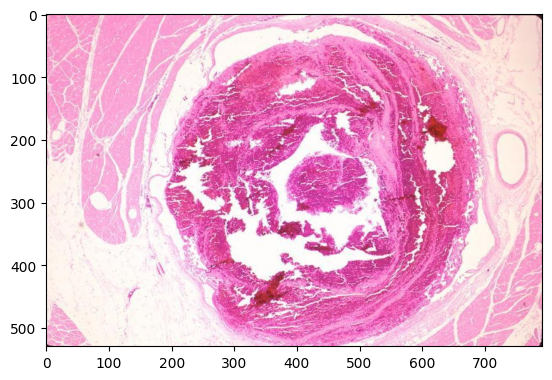

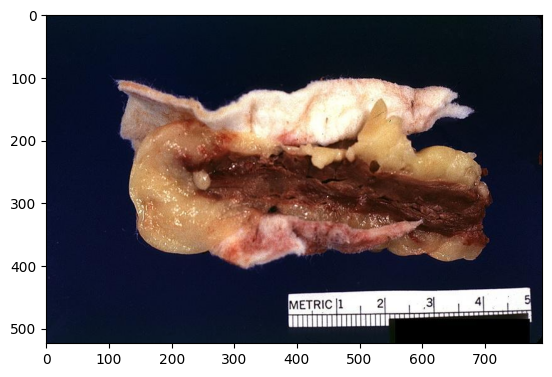

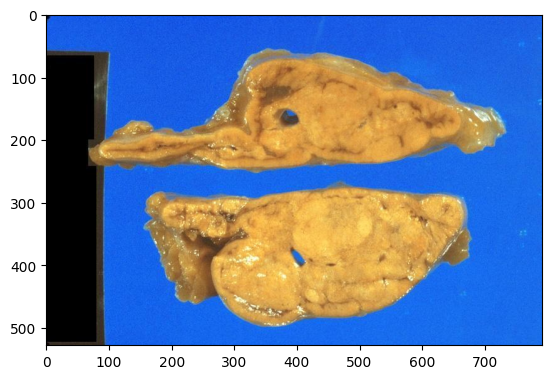

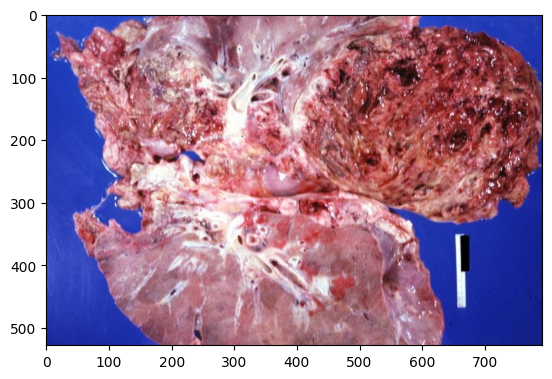

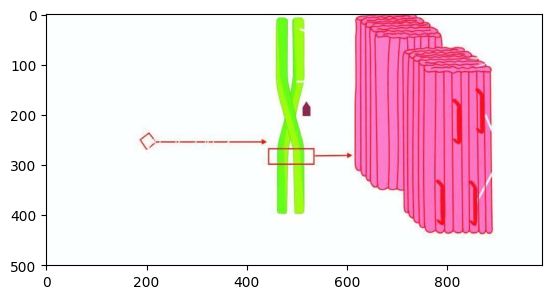

In [41]:
from aperturedb.NotebookHelpers import display as display_images
from aperturedb.Images import Images
query = query[:4]  # Keep the first three queries
query.append({
    "FindImage": {
        "blobs": True,
        "is_connected_to": {
            "ref": 3,
            "direction": "out"
        },
        "results": {
            "all_properties": True,
        },
        "limit": 5
    }
})

result, response, blobs = execute_query(client, query)
print(response[4])
if result == 0:
    # wrapper = Images(client, response=response[4]["FindImage"]["entities"], blobs=blobs)
    # wrapper.display()
    display(len(blobs))
    display_images(blobs)